In [1]:
import pandas as pd
import numpy as np
import os
from geopy.geocoders import Nominatim
from contextlib import suppress
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import Adam

In [13]:
bajra_df=pd.read_csv('bajra_final.csv').drop(['Unnamed: 0'],axis=1)
bajra_df

,Commodity,Min Price,Max Price,Modal Price,Latitude,Longitude,Date,Month,Year
0,Bajra(Pearl Millet/Cumbu),1885.0,1945.0,1915.0,28.613178,76.998285,16,12,19
1,Bajra(Pearl Millet/Cumbu),1825.0,1995.0,1910.0,28.613178,76.998285,15,12,19
2,Bajra(Pearl Millet/Cumbu),1950.0,1950.0,1950.0,28.613178,76.998285,14,12,19
3,Bajra(Pearl Millet/Cumbu),1841.0,1850.0,1845.0,28.613178,76.998285,12,12,19
4,Bajra(Pearl Millet/Cumbu),1870.0,2040.0,1955.0,28.613178,76.998285,10,12,19
...,...,...,...,...,...,...,...,...,...
242052,Bajra(Pearl Millet/Cumbu),1900.0,2000.0,1950.0,28.785205,77.586326,18,12,18
242053,Bajra(Pearl Millet/Cumbu),1900.0,2000.0,1950.0,28.785205,77.586326,17,12,18
242054,Bajra(Pearl Millet/Cumbu),750.0,850.0,750.0,28.785205,77.586326,29,11,11
242055,Bajra(Pearl Millet/Cumbu),800.0,850.0,800.0,28.785205,77.586326,26,11,11


In [37]:
def rect80(model1,learning_rate):
        model1.add(Dense(80,input_dim=5,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(80,activation='relu'))
        model1.add(Dense(3))

        adamopt=Adam(lr=learning_rate)
        model1.compile(loss='mae',optimizer=adamopt,metrics=['mse'])
        
def rect60(model1,learning_rate):
        model1.add(Dense(60,input_dim=5,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(60,activation='relu'))
        model1.add(Dense(3))

        adamopt=Adam(lr=learning_rate)
        model1.compile(loss='mae',optimizer=adamopt,metrics=['mse'])
        
models_dict={
    'rect80':rect80,
    'rect60':rect60
}

batch_size=[0,128]
learning_rates=[0.01,0.001,0.0001]

In [38]:
for model_func_name, model_func in models_dict.items():
  for learning_rate in learning_rates:
    for batch in batch_size:
        
        X=bajra_df[['Latitude','Longitude','Date','Month','Year']].values
        Y=bajra_df[['Min Price','Max Price','Modal Price']].values

        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)

        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        print(X_train.shape)
        X_test=sc.transform(X_test)
        
        print(model_func_name)
        model = Sequential()
        model_func(model,learning_rate)

        path='models\\'+model_func_name+'\\'+str(batch)+'_'+str(learning_rate)
        csv_logger=CSVLogger('models/'+model_func_name+'/'+str(batch)+'_'+str(learning_rate)+'training.log',separator=',',append=False)
        
        if batch==0:
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),callbacks=[csv_logger])
        else:    
            model.fit(X_train,Y_train,epochs=80,validation_data=(X_test,Y_test),batch_size=batch,callbacks=[csv_logger])
            
        model.save(path)

(229954, 5)
rect80
Train on 229954 samples, validate on 12103 samples
Epoch 1/80
229954/229954 [==============================] - 10s 45us/sample - loss: 133.8364 - mse: 65010.4375 - val_loss: 110.1912 - val_mse: 58319.2891
Epoch 2/80
229954/229954 [==============================] - 10s 45us/sample - loss: 98.2510 - mse: 47801.4844 - val_loss: 96.8627 - val_mse: 53728.4102
Epoch 3/80
229954/229954 [==============================] - 10s 45us/sample - loss: 89.1937 - mse: 44816.9297 - val_loss: 88.9475 - val_mse: 53345.6953
Epoch 4/80
229954/229954 [==============================] - 10s 45us/sample - loss: 85.8060 - mse: 43841.7148 - val_loss: 86.1293 - val_mse: 52178.4336
Epoch 5/80
229954/229954 [==============================] - 11s 46us/sample - loss: 83.7119 - mse: 43237.2656 - val_loss: 84.0699 - val_mse: 51688.4570
Epoch 6/80
229954/229954 [==============================] - 12s 51us/sample - loss: 82.0935 - mse: 42826.0195 - val_loss: 83.8802 - val_mse: 50649.8477
Epoch 7/80
22995

229954/229954 [==============================] - 3s 12us/sample - loss: 73.9823 - mse: 40639.3398 - val_loss: 74.7433 - val_mse: 48360.0078
Epoch 27/80
229954/229954 [==============================] - ETA: 0s - loss: 73.6154 - mse: 40740.69 - 3s 11us/sample - loss: 73.6299 - mse: 40486.5234 - val_loss: 74.3467 - val_mse: 48497.7344
Epoch 28/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.3430 - mse: 40409.1250 - val_loss: 74.7245 - val_mse: 48542.1406
Epoch 29/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.1965 - mse: 40333.3555 - val_loss: 73.4309 - val_mse: 48114.5898
Epoch 30/80
229954/229954 [==============================] - 3s 12us/sample - loss: 72.9015 - mse: 40260.9883 - val_loss: 76.8691 - val_mse: 49496.8477
Epoch 31/80
229954/229954 [==============================] - 3s 12us/sample - loss: 72.6368 - mse: 40161.0742 - val_loss: 73.4990 - val_mse: 48190.1602
Epoch 32/80
229954/229954 [==============================]

Epoch 80/80
229954/229954 [==============================] - 3s 12us/sample - loss: 67.4176 - mse: 38854.2344 - val_loss: 68.5879 - val_mse: 46954.9688
INFO:tensorflow:Assets written to: models\rect80\128_0.01\assets
(229954, 5)
rect80
Train on 229954 samples, validate on 12103 samples
Epoch 1/80
229954/229954 [==============================] - 11s 47us/sample - loss: 167.5338 - mse: 91519.5391 - val_loss: 142.5477 - val_mse: 73719.2734
Epoch 2/80
229954/229954 [==============================] - 10s 45us/sample - loss: 136.6564 - mse: 63349.5469 - val_loss: 131.6350 - val_mse: 68624.1406ss: 
Epoch 3/80
229954/229954 [==============================] - 10s 45us/sample - loss: 125.2355 - mse: 57895.3828 - val_loss: 120.6683 - val_mse: 64864.0547
Epoch 4/80
229954/229954 [==============================] - 10s 45us/sample - loss: 114.7167 - mse: 53491.8672 - val_loss: 115.2486 - val_mse: 60376.3555
Epoch 5/80
229954/229954 [==============================] - 10s 44us/sample - loss: 108.2525 

229954/229954 [==============================] - 10s 41us/sample - loss: 75.2567 - mse: 41141.2695 - val_loss: 77.7781 - val_mse: 49552.1055
Epoch 53/80
229954/229954 [==============================] - 10s 42us/sample - loss: 75.1608 - mse: 41116.0234 - val_loss: 75.9597 - val_mse: 49180.6250
Epoch 54/80
229954/229954 [==============================] - 10s 42us/sample - loss: 75.0131 - mse: 41045.4375 - val_loss: 75.9016 - val_mse: 49162.6562
Epoch 55/80
229954/229954 [==============================] - 10s 42us/sample - loss: 74.9509 - mse: 40958.7578 - val_loss: 74.8118 - val_mse: 48983.6641 - ETA: 0s - loss: 74.9625 - mse: 41069.97
Epoch 56/80
229954/229954 [==============================] - 10s 42us/sample - loss: 74.7646 - mse: 40961.3711 - val_loss: 75.8023 - val_mse: 49141.1172
Epoch 57/80
229954/229954 [==============================] - 10s 42us/sample - loss: 74.6285 - mse: 40971.1562 - val_loss: 76.4855 - val_mse: 49846.3672
Epoch 58/80
229954/229954 [=========================

229954/229954 [==============================] - 3s 11us/sample - loss: 80.2467 - mse: 42193.8711 - val_loss: 84.2670 - val_mse: 50245.8594
Epoch 78/80
229954/229954 [==============================] - 3s 13us/sample - loss: 80.2907 - mse: 42219.2188 - val_loss: 83.2855 - val_mse: 50096.6367
Epoch 79/80
229954/229954 [==============================] - 3s 13us/sample - loss: 80.0261 - mse: 42139.2266 - val_loss: 79.6719 - val_mse: 49870.9766
Epoch 80/80
229954/229954 [==============================] - 3s 12us/sample - loss: 80.0979 - mse: 42202.0859 - val_loss: 82.8841 - val_mse: 50335.5430
INFO:tensorflow:Assets written to: models\rect80\128_0.001\assets
(229954, 5)
rect80
Train on 229954 samples, validate on 12103 samples
Epoch 1/80
229954/229954 [==============================] - 10s 44us/sample - loss: 294.2175 - mse: 237081.4531 - val_loss: 168.6579 - val_mse: 90424.2656
Epoch 2/80
229954/229954 [==============================] - 10s 44us/sample - loss: 160.7033 - mse: 77211.4062 - 

229954/229954 [==============================] - 3s 12us/sample - loss: 141.9640 - mse: 66367.2734 - val_loss: 142.7286 - val_mse: 74606.1797
Epoch 19/80
229954/229954 [==============================] - 3s 12us/sample - loss: 141.1138 - mse: 65929.3594 - val_loss: 141.8736 - val_mse: 73883.7812
Epoch 20/80
229954/229954 [==============================] - 3s 12us/sample - loss: 140.2795 - mse: 65493.5977 - val_loss: 141.0067 - val_mse: 73410.5938
Epoch 21/80
229954/229954 [==============================] - 3s 12us/sample - loss: 139.4725 - mse: 65083.8242 - val_loss: 140.1870 - val_mse: 73082.6094
Epoch 22/80
229954/229954 [==============================] - 3s 12us/sample - loss: 138.7737 - mse: 64721.8164 - val_loss: 139.5565 - val_mse: 72709.3047
Epoch 23/80
229954/229954 [==============================] - 3s 12us/sample - loss: 138.0555 - mse: 64368.9062 - val_loss: 138.7983 - val_mse: 72544.4453
Epoch 24/80
229954/229954 [==============================] - 3s 12us/sample - loss: 137.

229954/229954 [==============================] - 11s 46us/sample - loss: 76.9856 - mse: 41347.3086 - val_loss: 78.6923 - val_mse: 49530.7773
Epoch 40/80
229954/229954 [==============================] - 11s 46us/sample - loss: 76.9369 - mse: 41304.2070 - val_loss: 81.1754 - val_mse: 49484.2539
Epoch 41/80
229954/229954 [==============================] - 11s 46us/sample - loss: 76.8928 - mse: 41325.5938 - val_loss: 79.2008 - val_mse: 49649.4844
Epoch 42/80
229954/229954 [==============================] - 11s 47us/sample - loss: 76.8993 - mse: 41323.5703 - val_loss: 78.5811 - val_mse: 49531.6016
Epoch 43/80
229954/229954 [==============================] - 11s 46us/sample - loss: 76.7886 - mse: 41308.0547 - val_loss: 77.2145 - val_mse: 49265.0469
Epoch 44/80
229954/229954 [==============================] - 11s 46us/sample - loss: 76.7654 - mse: 41263.7383 - val_loss: 77.1441 - val_mse: 48712.5781
Epoch 45/80
229954/229954 [==============================] - 11s 47us/sample - loss: 76.7023 -

Epoch 63/80
229954/229954 [==============================] - 3s 13us/sample - loss: 68.2977 - mse: 38717.4453 - val_loss: 68.9444 - val_mse: 46659.3516
Epoch 64/80
229954/229954 [==============================] - 3s 13us/sample - loss: 68.2535 - mse: 38687.6094 - val_loss: 69.8977 - val_mse: 46770.7695
Epoch 65/80
229954/229954 [==============================] - 3s 13us/sample - loss: 68.1945 - mse: 38683.2891 - val_loss: 68.7212 - val_mse: 46724.3477
Epoch 66/80
229954/229954 [==============================] - 3s 12us/sample - loss: 68.2749 - mse: 38745.6836 - val_loss: 69.2039 - val_mse: 46743.0430
Epoch 67/80
229954/229954 [==============================] - 3s 13us/sample - loss: 68.0501 - mse: 38703.3555 - val_loss: 71.6793 - val_mse: 47114.5273
Epoch 68/80
229954/229954 [==============================] - 3s 13us/sample - loss: 68.1516 - mse: 38662.3047 - val_loss: 69.4950 - val_mse: 46712.8398
Epoch 69/80
229954/229954 [==============================] - 3s 13us/sample - loss: 67.9

229954/229954 [==============================] - 3s 13us/sample - loss: 99.3915 - mse: 48808.8828 - val_loss: 95.5330 - val_mse: 55278.6445
Epoch 7/80
229954/229954 [==============================] - 3s 13us/sample - loss: 93.8780 - mse: 46969.1289 - val_loss: 91.6662 - val_mse: 54250.6250
Epoch 8/80
229954/229954 [==============================] - 3s 14us/sample - loss: 91.5908 - mse: 46159.3125 - val_loss: 92.5780 - val_mse: 54304.1016
Epoch 9/80
229954/229954 [==============================] - 3s 14us/sample - loss: 90.0489 - mse: 45609.4727 - val_loss: 90.3331 - val_mse: 54177.8594
Epoch 10/80
229954/229954 [==============================] - 3s 14us/sample - loss: 88.7388 - mse: 45202.3516 - val_loss: 89.3361 - val_mse: 53046.5039
Epoch 11/80
229954/229954 [==============================] - 3s 14us/sample - loss: 87.4643 - mse: 44711.5820 - val_loss: 87.4507 - val_mse: 52279.8789
Epoch 12/80
229954/229954 [==============================] - 3s 14us/sample - loss: 86.4215 - mse: 4426

Epoch 60/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.7398 - mse: 40450.9219 - val_loss: 74.8469 - val_mse: 48419.5156
Epoch 61/80
229954/229954 [==============================] - 3s 13us/sample - loss: 73.6360 - mse: 40411.7383 - val_loss: 75.1902 - val_mse: 49023.8086
Epoch 62/80
229954/229954 [==============================] - 3s 13us/sample - loss: 73.7897 - mse: 40452.3672 - val_loss: 76.5459 - val_mse: 49667.9180
Epoch 63/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.2967 - mse: 40339.7148 - val_loss: 76.2962 - val_mse: 49917.1250
Epoch 64/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.3526 - mse: 40296.9922 - val_loss: 74.9228 - val_mse: 48503.8398
Epoch 65/80
229954/229954 [==============================] - 3s 12us/sample - loss: 73.3618 - mse: 40333.5859 - val_loss: 74.9241 - val_mse: 48310.7422
Epoch 66/80
229954/229954 [==============================] - 3s 13us/sample - loss: 73.1

229954/229954 [==============================] - 11s 46us/sample - loss: 81.4654 - mse: 43679.3867 - val_loss: 82.9340 - val_mse: 52104.941424 - mse: 4151 - ETA: 4s - loss: 8 - ETA: 3s - - E - ETA: 1s - loss: 81.5287 - mse: 43 - ETA: 0s - loss: 8
Epoch 60/80
229954/229954 [==============================] - 10s 45us/sample - loss: 81.3589 - mse: 43653.2070 - val_loss: 82.6017 - val_mse: 51216.9375
Epoch 61/80
229954/229954 [==============================] - 11s 46us/sample - loss: 81.1703 - mse: 43581.1797 - val_loss: 81.7326 - val_mse: 51410.6875
Epoch 62/80
229954/229954 [==============================] - 11s 46us/sample - loss: 81.0460 - mse: 43542.9023 - val_loss: 82.3844 - val_mse: 51495.734433 - mse:  - E
Epoch 63/80
229954/229954 [==============================] - 11s 46us/sample - loss: 80.9003 - mse: 43483.6836 - val_loss: 81.3908 - val_mse: 51460.7188
Epoch 64/80
229954/229954 [==============================] - 11s 46us/sample - loss: 80.7743 - mse: 43464.7070 - val_loss: 82.5

Epoch 29/80
229954/229954 [==============================] - 3s 12us/sample - loss: 114.9050 - mse: 54674.3789 - val_loss: 114.4043 - val_mse: 62161.6406
Epoch 30/80
229954/229954 [==============================] - 3s 12us/sample - loss: 113.2909 - mse: 54061.3828 - val_loss: 113.4173 - val_mse: 62045.9844
Epoch 31/80
229954/229954 [==============================] - 3s 13us/sample - loss: 111.7445 - mse: 53474.6094 - val_loss: 111.3086 - val_mse: 60653.6172
Epoch 32/80
229954/229954 [==============================] - 3s 12us/sample - loss: 110.1235 - mse: 52888.7266 - val_loss: 109.5860 - val_mse: 60245.3477
Epoch 33/80
229954/229954 [==============================] - 3s 12us/sample - loss: 108.6145 - mse: 52322.7695 - val_loss: 108.0980 - val_mse: 59811.8672
Epoch 34/80
229954/229954 [==============================] - 3s 14us/sample - loss: 106.8885 - mse: 51743.9023 - val_loss: 106.7058 - val_mse: 59548.3633
Epoch 35/80
229954/229954 [==============================] - 3s 14us/sample 

In [3]:
#testing performance of all variations of rect80, rect60

In [7]:
path='C:/Users/ABC/Desktop/BE Project/from milan/bajra/models'
archs=['rect60']
folders=['loss_mae']
learning_rate=[0.001]
batch_sizes=[0]

In [8]:
bajra_df=pd.read_csv('bajra_final.csv').drop(['Unnamed: 0'],axis=1)

In [9]:
X=bajra_df[['Latitude','Longitude','Date','Month','Year']].values
Y=bajra_df[['Min Price','Max Price','Modal Price']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.05,random_state=26)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
for arch in archs:
    for folder in folders:
        for batch_size in batch_sizes:
            for lr in learning_rate:

                model=tf.keras.models.load_model(os.path.join(path,arch+'/'+folder+'/'+str(batch_size)+'_'+str(lr)))
                #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))

                Y_pred=model.predict(X_test)
                percent_acc=np.zeros((len(X_test),3))

                for i in range(len(X_test)):
                    for j in range(3):
                        percent_acc[i][j]=abs(Y_test[i][j]-Y_pred[i][j])*100/Y_test[i][j]   

                print(sum(percent_acc)/len(X_test),batch_size,lr,folder,arch)

[6.04338138 5.95726345 5.45740215] 0 0.001 loss_mae rect60


In [12]:
for arch in archs:
    for folder in folders:
        for batch_size in batch_sizes:
            for lr in learning_rate:

                model=tf.keras.models.load_model(os.path.join(path,arch+'/'+folder+'/'+str(batch_size)+'_'+str(lr)))
                #log_data=pd.read_csv(os.path.join(path,folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))

                Y_pred=model.predict(X_test)
                percent_acc=np.zeros((len(X_test),3))

                percent_acc=abs(Y_test-Y_pred)*100/Y_test   

                print(sum(percent_acc)/len(X_test),batch_size,lr,folder,arch)

[6.04338138 5.95726345 5.45740215] 0 0.001 loss_mae rect60


In [ ]:
////////////////////////////

MAE :  64.71834639038457 , val_MAE :  66.11552110230895 
Batch size :  0 , Learning Rate :  0.001 
Loss Function :  loss_mae   rect60


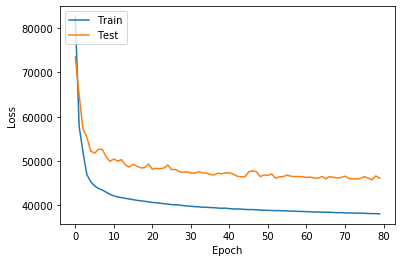

In [8]:
for arch in archs:    
    for folder in folders:
        for batch_size in batch_sizes:
            for lr in learning_rate:
                log_data=pd.read_csv(os.path.join(path,arch+'/'+folder+'/'+str(batch_size)+'_'+str(lr)+'training.log'))

                if folder=='loss_mse':
                    print('MAE : ',log_data['mae'][79],', val_MAE : ',log_data['val_mae'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,' ',arch)
                    #df2[arch]=log_data['val_mae']
                    plt.plot(log_data['mae'])
                    plt.plot(log_data['val_mae'])
                    plt.ylabel('Loss')
                    plt.xlabel('Epoch')
                    plt.legend(['Train','Test'],loc='upper left')
                    plt.show()

                if folder=='loss_mae':
                    print('MAE : ',log_data['loss'][79],', val_MAE : ',log_data['val_loss'][79],'\nBatch size : ',batch_size,', Learning Rate : ',lr,'\nLoss Function : ' ,folder,' ',arch)
                    #df2[arch]=log_data['val_loss']
                    plt.plot(log_data['mse'])
                    plt.plot(log_data['val_mse'])
                    plt.ylabel('Loss')
                    plt.xlabel('Epoch')
                    plt.legend(['Train','Test'],loc='upper left')
                    plt.show()

In [18]:
df=pd.DataFrame()
df1=pd.DataFrame()
df2=pd.DataFrame()

In [27]:
df=df.rename(columns={0:'Batch GD',128:'MinibatchGD'})

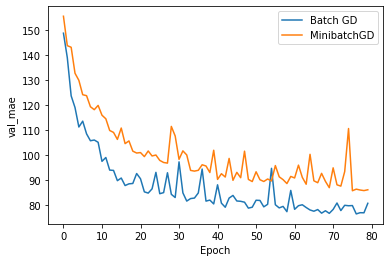

In [28]:
plt.plot(df)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df.columns,loc='upper right')

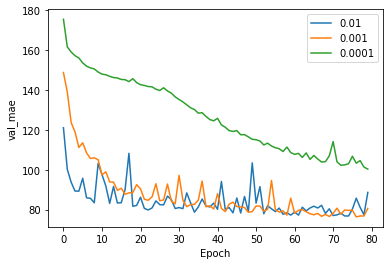

In [34]:
plt.plot(df1)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df1.columns,loc='upper right')

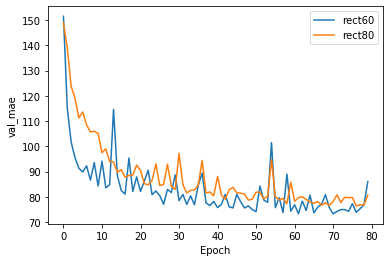

In [46]:
plt.plot(df2)
plt.ylabel('val_mae')
plt.xlabel('Epoch')
plt.legend(df2.columns,loc='upper right')

In [45]:
df2

,rect60,rect80
0,151.515610,148.853450
1,115.053696,139.037920
2,101.695630,123.722340
3,95.441830,119.028404
4,91.299080,111.220120
...,...,...
75,77.227070,79.697174
76,73.807920,76.347650
77,75.295650,76.836560
78,76.727170,76.797240
